# Image Basics

&copy; 李浩东 3190104890@zju.edu.cn

&copy; 孙正男 3190102989@zju.edu.cn

- Brief introduction of `OpenCV`
- Pixels, colors, and image formats


# 1 OpenCV

- `OpenCV` 是一个开源的计算机视觉库，用C语言和C++语言编写. 可以在 Windows、Linux、Mac OS 等系统运行。同时也在积极开发 Python、Java、Matlab 以及其他一些语言的接口。
- `OpenCV` 包含从计算机视觉各个领域衍生出来的 500 多个函数

## 1.1 我们可以用opencv做什么？
- 图像复原 <br>
    <img src="images/opencv-basic/图像复原.png" style="zoom:90%;">

- 图像增强 <br>
    <img src="images/opencv-basic/图像增强.png" style="zoom:90%;">

- 模板匹配 <br>
    <img src="https://docs.opencv.org/4.x/res_mario.jpg" style="zoom:130%;">

- 特征匹配 <br>
    <img src="https://docs.opencv.org/4.x/matcher_result1.jpg" style="zoom:130%;">
- 人脸识别
- 动作识别
- Motion tracking
- Motion analysis

# 1.2 opencv中图像是如何表示的？
- 在Opencv中，图像对象的数据是由Mat来表示的。对计算机来说，图像就是一个矩阵，因此Mat最主要的部分就是一个矩阵数据。
    <img src="images/opencv-basic/图像表示.png" style="zoom:80%;">
- 除此之外，Mat还包括一些图像的属性，比如图像的长度、宽度、通道数等，我们可以用rows，cols，channels()来获取这些属性。

- 除了图像的属性外，图像的像素也有它自己的格式。像素就是矩阵中的一个数据，这个数据的大小就表示了颜色的深浅。由于图像的通道包括单通道的和多通道的，所以像素也分为两种，单通道的就是一个数据就可以，多通道的需要多个数字组成一个像素。
    <img src="images/opencv-basic/rgb通道.png" style="zoom:60%;">

* 最常见的像素格式就是CV_8U，这表示这是单通道的像素格式，或者说为一个灰度图像，它的像素值为8个字节，用C++中unsigned char数据类型表示。另一个彩色图像的像素可以用CV_8UC3来表示，8U含义与单通道的一样，C3表示三个通道（channels)，表示彩色像素类型，由三个数据RGB表示。若是灰度图像，则这三个RGB数据都相等。
<table>
  <tr>
    <td><img src="images/opencv-basic/gray_scale.png" width=400><td>
    <td><img src="images/opencv-basic/RGB2color.png" width=600><td>
  </tr>
<\table>  

# 2 图像基础（结合代码）
- 图像数据主要以矩阵形式存储

In [1]:
import pandas as pd
import numpy as np

data_file = ".\data\cat.csv"
cat = pd.read_csv(data_file)
cat

,R,G,B
0,213,218,222
1,213,218,222
2,213,218,222
3,213,218,222
4,213,218,222
...,...,...,...
243044,216,219,226
243045,216,219,226
243046,215,218,225
243047,215,218,225


In [2]:
print(cat.shape)
print(type(cat))
# define matrix
width = height = 493
cat_rgb = []
for i in range(height):
    row = []
    for j in range(width):
        index = i * height + j
        rgb_element = [cat.at[index, 'R'], cat.at[index, 'G'], cat.at[index, 'B']]
        row.append(rgb_element)
    cat_rgb.append(row)
# data type transfermation
cat_rgb = np.array(cat_rgb)
print(cat_rgb.shape)
print(type(cat_rgb))

(243049, 3)
<class 'pandas.core.frame.DataFrame'>
(493, 493, 3)
<class 'numpy.ndarray'>


In [3]:
print(cat_rgb)
# 493 rows
# 493 rgb elements in each row

[[[213 218 222]
  [213 218 222]
  [213 218 222]
  ...
  [151 155 158]
  [150 154 157]
  [149 153 156]]

 [[213 218 222]
  [213 218 222]
  [213 218 222]
  ...
  [145 149 152]
  [144 148 151]
  [143 147 150]]

 [[213 218 222]
  [213 218 222]
  [213 218 222]
  ...
  [141 145 148]
  [140 144 147]
  [139 143 146]]

 ...

 [[ 19  18  14]
  [ 19  18  14]
  [ 19  18  14]
  ...
  [215 218 225]
  [215 218 225]
  [215 218 225]]

 [[ 19  18  14]
  [ 19  18  14]
  [ 18  17  13]
  ...
  [215 218 225]
  [215 218 225]
  [215 218 225]]

 [[ 19  18  14]
  [ 18  17  13]
  [ 18  17  13]
  ...
  [215 218 225]
  [215 218 225]
  [215 218 225]]]


- matplotlib库显示图像

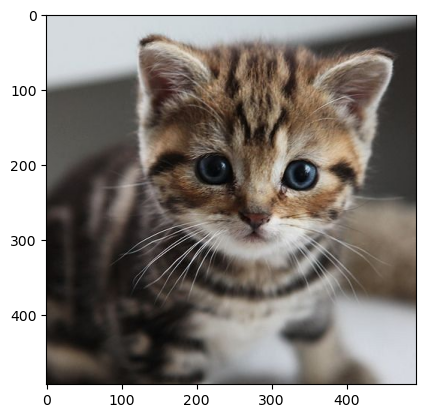

In [4]:
from matplotlib import pyplot as plt
import matplotlib.colors as mat_color

no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
plt.imshow(cat_rgb, norm=no_norm)

## 2.1 Opencv 图像读写
- opencv图像保存

In [5]:
import cv2  # opencv-python 库

# rgb -> bgr
cat_rgb_uint8 = cat_rgb.astype(np.uint8)  #python类型转换
cat_bgr = cv2.cvtColor(cat_rgb_uint8,cv2.COLOR_RGB2BGR)

# save cat_bgr
save_path = ".\data\cat.jpg"
cv2.imwrite(save_path, cat_bgr)

True

- opencv图像读取
    - 在读取时，还能够自行选择图像的读取格式，常用的有IMREAD_GRAYSCALE和IMREAD_COLOR，前一个表示灰度图像，后一个表示RGB图像
- 在opencv中彩色图像一般存储为 $h \times w \times 3$ 形式的numpy数组，其中h为图像高，w为图像宽，3为**BGR**三个颜色通道。

(493, 493, 3)
<class 'numpy.ndarray'>


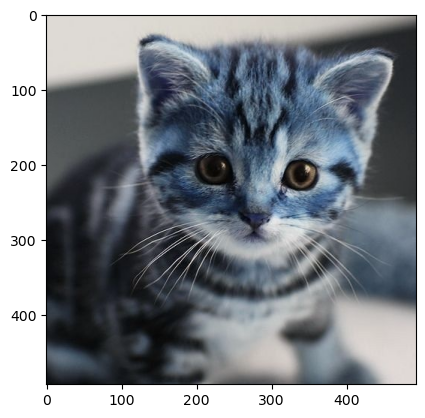

In [6]:
# read cat_bgr
cat_bgr = cv2.imread(save_path, cv2.IMREAD_COLOR)
print(cat_bgr.shape)
print(type(cat_bgr))

# matplot display cat_bgr
plt.imshow(cat_bgr, norm=no_norm)

## 2.2 Image formats

- Just shown is the `RGB` image type, which is in line with human vision
- In addition to the `RGB` series, common color spaces include `HSV`, `HSL`, `XYZ`, etc.
    - `Hue`色相
    - `Saturation` 饱和度
    - `Value/Lightness` 明度
    <img src=".\images\opencv-basic\hsv原理.jpg" style="zoom:50%;">

- In image recognition, `RGB` is easily affected by light
    - Manual compensation through programming
    - Convert it into `HSV` mode
- `RGB -> HSV`

$$
s_{\mathrm{HSV}}=\frac{\max \{r, g, b\}-\min \{r, g, b\}}{\max \{r, g, b\}}
$$


- `HSV -> RGB`

$$
\begin{aligned}
c_{1} &=\left\lfloor h^{\prime}\right\rfloor \\
c_{2} &=h^{\prime}-c_{1} \\
w_{1} &=\left(1-s_{\mathrm{HSV}}\right) \cdot v \\
w_{2} &=\left(1-s_{\mathrm{HSV}} \cdot c_{2}\right) \cdot v \\
w_{3} &=\left(1-s_{\mathrm{HSV}} \cdot\left(1-c_{2}\right)\right) \cdot v \\
\left(\begin{array}{l}
r \\
g \\
b
\end{array}\right) &= \begin{cases}\left(v, w_{3}, w_{1}\right)^{\mathrm{T}} & \text { if } c_{1}=0 \\
\left(w_{2}, v, w_{1}\right)^{\mathrm{T}} & \text { if } c_{1}=1 \\
\left(w_{1}, v, w_{3}\right)^{\mathrm{T}} & \text { if } c_{1}=2 \\
\left(w_{1}, w_{2}, v\right)^{\mathrm{T}} & \text { if } c_{1}=3 \\
\left(w_{3}, w_{1}, v\right)^{\mathrm{T}} & \text { if } c_{1}=4 \\
\left(v, w_{1}, w_{2}\right)^{\mathrm{T}} & \text { if } c_{1}=5\end{cases}
\end{aligned}
$$

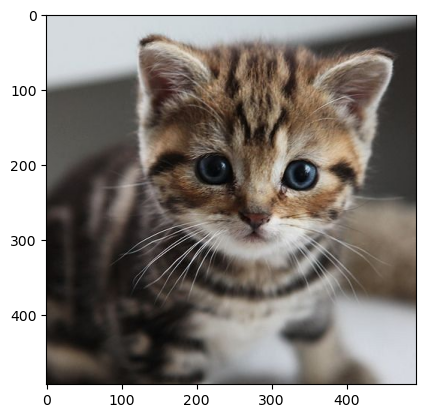

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = "./images/cat.jpg"
# read original BGR image
img_bgr = cv2.imread(path)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, norm=no_norm)

- 运用opencv 实现HSV与RGB格式之间的转换

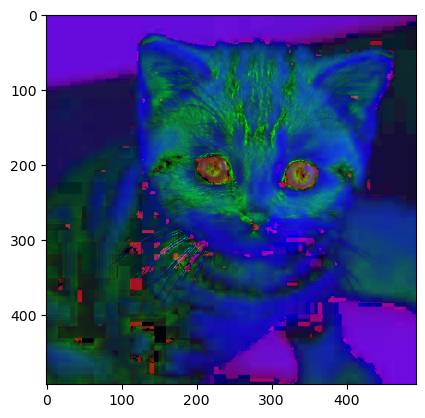

In [8]:
# rgb -> hsv
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv, norm=no_norm)

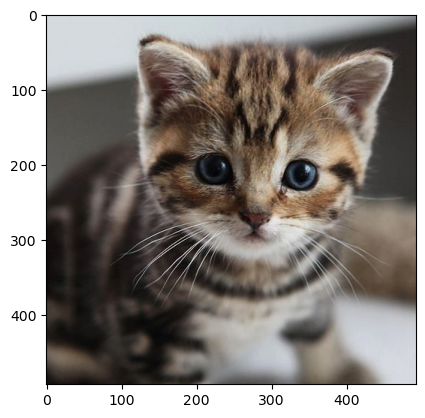

In [9]:
# hsv -> rgb
img_rgb2 = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb2, norm=no_norm)

# 3 Application of OpenCV

- Filtering, binarization, cutting, scale and rotation transformations, image gradients
- Line and circle detection, feature point detection, edge detection, blob detection, feature point detection, pattern recognition
    - QR code identification
    - Face detection
    - Gesture recognition
    - Human gesture recognition

![opencv_0](./images/opencv_0.jpg)

![opencv](./images/opencv_1.jpg)

![opencv](./images/opencv_2.jpg)

![opencv](./images/opencv_3.jpg)